Antonnia Abdul
Data Science:Task 22
sutudent no: AN24020013912

In [2]:
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_digits
digits_df = load_digits()

In [3]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits_df.data.shape)

# Print to show there are 1797 labels (integers from 0-9)
print("Label Data Shape", digits_df.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


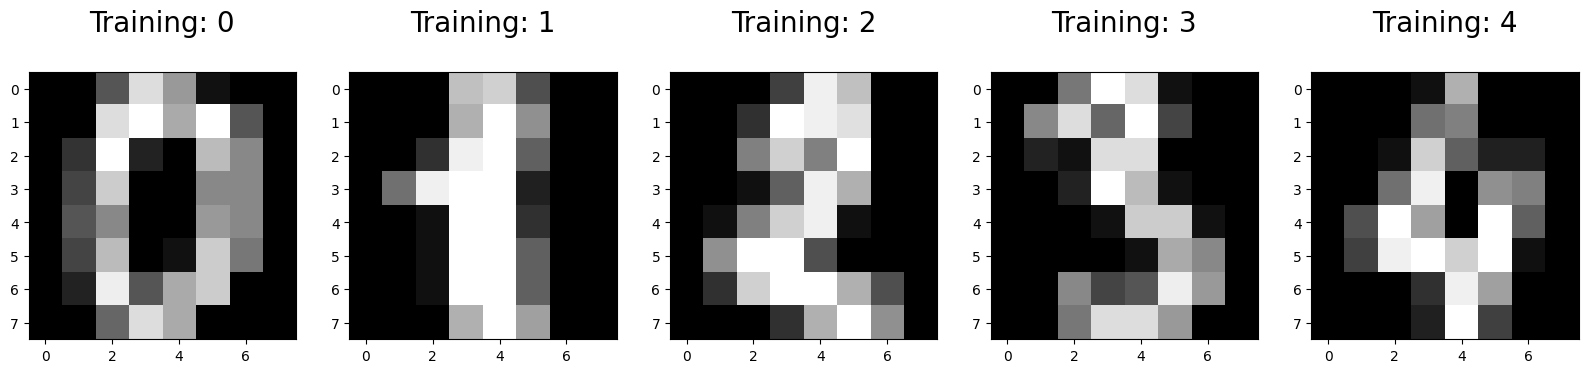

In [4]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits_df.data[0:5], digits_df.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [5]:
#define X and y
X = digits_df["data"]
y = digits_df["target"]       

In [6]:
#spliting data into test and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

------------------------------------------------------------------------------------------------------------------
**Random Forest Classification**

In the case of a random forest, hyperparameters include the number of decision trees in the forest and the number of features considered by each tree when splitting a node.

Using Scikit-Learn’s RandomizedSearchCV method, we can define a grid of hyperparameter ranges, and randomly sample from the grid, performing K-Fold CV with each combination of values.

In [7]:
#RandomForest to create a classification model

random_clf = RandomForestClassifier(n_estimators=100,random_state=42)
random_clf.fit(X_train, y_train)

y_pred = random_clf.predict(X_test)

print("random forest model : ",random_clf.score(X_test,y_test))
print("Testing accuracy for random forest model:", accuracy_score(y_test, y_pred))

random forest model :  0.9711111111111111
Testing accuracy for random forest model: 0.9711111111111111


In [8]:
# Hyperparameter tuning for Random Forest using GridSearchCV and fit the data.

params = {
    'max_depth': [3,4,5,6],
    'n_estimators': [100,300,400,600]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=random_clf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1,
                           scoring="accuracy")

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 16 candidates, totalling 64 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6],
                         'n_estimators': [100, 300, 400, 600]},
             scoring='accuracy', verbose=1)

In [9]:
#Check best score hyperparameters
print(grid_search.best_score_)
rf_best = grid_search.best_estimator_
rf_best

0.9554564963967782


RandomForestClassifier(max_depth=6, n_estimators=400, random_state=42)

**Confusion Matrix**

A confusion matrix visualizes and summarizes the performance of a classification algorithm. 

<Figure size 1000x400 with 0 Axes>

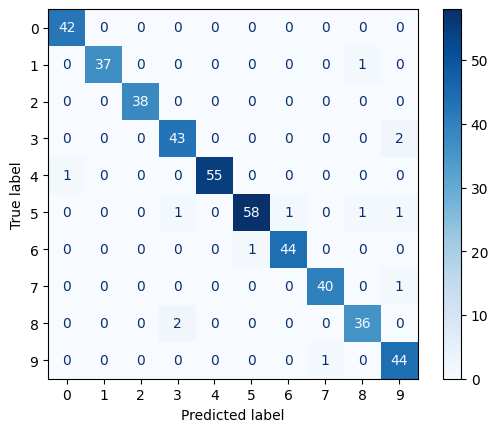

In [10]:
cm = confusion_matrix(y_pred, y_test,labels=random_clf.classes_)
# sns.heatmap can also be used to get the confusion matrix

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=random_clf.classes_)
plt.figure(figsize=(10, 4))
disp.plot(cmap='Blues')

Based on the Confusion Matrix, the model struggled the most to predict the 5 class, followed by the 3 and 8 classes. 1, 4, 6, 7, 9 also had minor on the prediction.
Contrary to this 0 and 2 classes were prefectly predicted.

**SkLearn metrics**

In [11]:
#Accuracy

accuracy_score(y_test, y_pred)

0.9711111111111111

In [12]:
#Precision 

precision_score(y_test, y_pred, average='macro')

0.9725400226898218

In [13]:
#Recall 

recall_score(y_test, y_pred, average='macro')

0.9712000263794428

In [14]:
#f1 score

f1_score(y_test, y_pred, average='macro')

0.9716618096848417

The Sklearn metrics all shows a score close to 1



**Appendix**

https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

https://www.sciencedirect.com/topics/engineering/confusion-matrix#:~:text=A%20confusion%20matrix%20is%20a,performance%20of%20a%20classification%20algorithm.